<h1> Blackbox Explanation Methods </h1>

Welcome here you will be introduced to and gain experience in using some methods of explaining blackbox models. 

You will be expected create an ML model to predict an outcome, you will be expected to use a variety of models both explainable models and black box models. You will spend some very limited time reflecting on and improving the accuracy of the prediction model. The main objective however is to investigate and explain the decision making process of the various models both explainable and black box.

<h2>Learning Objectives:</h2>

- Gain experience in implementing and using blackbox algorithm explanation techniques
- To investigate gaining insights into blackbox decision making algorithms 
- To critically appraise varied techniques in their use and limitations in explaining blackbox algorithms

<h3>Blackbox Inspection Techniques - Global Explanations:</h3>

In this lab we will focus on two global explanation methods that focus on understanding the influence of each input feature on the the outcome. These are explanations based on a blackbox inspection technique, illustrated in Figure 1 below and described as a greybox technique in [1].

- Permutation Importance [2]
- Partial Differential Plots

<img src="images/blackbox_inpection.png" style="width:800px;">
<caption><center> <i><b>Figure 1:</b> Blackbox inspection technique (sometimes known as greybox)</i>  </center></caption>

    
[1] R. Guidotti, A. Monreale, S. Ruggieri, F. Turini, D. Pedreschi, and F. Giannotti, “A Survey Of Methods For Explaining Black Box Models,” ACM Comput. Surv., Feb. 2018. https://dl.acm.org/doi/10.1145/3236009
    
[2] A. Fisher, C. Rudin, and F. Dominici, “All models are wrong, but many are useful: Learning a variable’s importance by studying an entire class of prediction models simultaneously,” J. Mach. Learn. Res., vol. 20, no. Vi, 2019. https://arxiv.org/abs/1801.01489
    
    
Run the following cell to import libraries needed for this workbook

In [1]:
import sys
import os
from platform import python_version 

print('Python version:', python_version()) # print the version of python the script is using
print('Python path:', sys.executable) # print the path for the python executable the script is using
print('Working Directory:', os.getcwd()) # print the current working directory    

#------------- Load in some helpful packages we will use for the lab -------------------------

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # randomly split data into test and train
from sklearn.ensemble import RandomForestClassifier # import classifier from sklearn 
from sklearn.neural_network import MLPClassifier  # import classifier from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
 

Python version: 3.7.4
Python path: /Users/Andy/opt/anaconda3/bin/python
Working Directory: /Users/Andy/Developer/Swansea Uni/CDT/Semester 2/CSCM21 - Abuses, Biases and Blessing of Data/CSCM21 - Abuses, Biases and Blessing of Data/Labs/Lab 2/Global Blackbox Explainations Lab


<h1>1. Building ML Models</h1>

In the fist section of this work book you will build a number of different ML models that are able to predict someone chances of survival on the titanic, using the famous Titanic data set from the seminal Kaggle competition. The data set is already included in your zip download.


## 1.1 Load and View the Data

In this section you will load the data, into a Pandas DataFrame named `data`. All you need to know about Pandas DataFrames is illustrated below in Figure 2, if you would like you can find more info on the provided links. 

<img src="images/finallpandas.png" style="width:500px;">
<caption><center><i> <b>Figure 2:</b> Pandas DataFrame  is two-dimensional tabular data structure with labeled axes and consists of three principal components, the <font color='purple'><b>data</b></font>, <font color='orange'><b>rows</b></font>, and <font color='blue'><b>columns</b></font>.</i> </center></caption>

**Optional information** see data geeks for simple explanation and source of Figure 2 https://www.geeksforgeeks.org/python-pandas-dataframe/#. Alternatively you can visit the official Pandas DataFrame usage page https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

**Your tasks are to:**

- run the cell to load the data into `data`.
- print the number of rows and columns in `data`.
- view the top handful of rows of data
- view the bottom handful of rows of data (NOTE: this in in a separate cell below)

**Hint** You will need to use some methods of  DataFrame to complete the tasks above. Below are links to the usage documentation for the methods:

- `DataFrame.shape` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)
- `DataFrame.head` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- `DataFrame.tail` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)

In [2]:
data = pd.read_csv(os.getcwd() + "/titanicData/train.csv")  #1.  reads the csv file into DataFrame

### START CODE ####
# 1. print number of rows and columns
print('Number of rows and columns in the data: ', len(data))

# 2. view top rows of the data set
data.head()

### END CODE ###

Number of rows and columns in the data:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
### START CODE ####
# 3. view bottom rows of the data set
data.tail()

### END CODE ###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h2>1.2 Orginaise & Clean Data</h2>

In order to build a predictive model we need to to prepare and clean the data. Obviously there is lots of analysis that could be done on the data, its method of capture, understanding the potential impact of the data cleaning approaches have on the remaining data and therefore the model. However, since this is not the focus of this lab we will employ simple speedy approaches.

Running the cell below will:

- convert categorical data into numerical representations
- remove rows with $nan$ or $inf$ values.

**Your task is to:**

- print the numbers of rows and columns in the DataFrame
- view the bottom handful of rows. Notice the additional numerical representations for categorical columns `Sex_code` and `Embarked_code` and the fact that Miss. Catherine Helen "Carrie" Johnston, Passenger Id 889 has been cleaned from the data. 


In [4]:
# changing the categorical categorical data into numeric values for learning 
data.Sex = pd.Categorical(data.Sex)
data['Sex_code'] = data.Sex.cat.codes
data.Embarked = pd.Categorical(data.Embarked)
data['Embarked_code'] = data.Embarked.cat.codes

# remove rows of data that where values are inf or nan
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Age','Fare'])

### START CODE ####
#print number of rows and columns
print(clean_data.shape)

#view the bottom rows of the data
clean_data.tail()
### END CODE ###

(714, 14)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q,1,1


## 1.3 Create Test and Train Data Sets for Model Training

In this section we will take the data set from the DataFrame create train and test data sets to train some ML models to predict survival of the titanic disaster. 

Running the code will:

- Create an input data set `X`, and a label data set `y`

**Your tasks are to:**

- Split `X` and `y` into train and test sets (python arrays)
    - `train_X` and `val_X` and `train_y` and `val_y`
    - call `train_test_split(INPUT, LABEL, random_state=1)` [Link to usage](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- print `feature_names` to see a list of feature included as inputs to the model.
- print the number of rows and columns for the test and training data matrices, **hint** use `shape`.
- print the values contained in the test and training data matrices.
  - training and testing data matrices `train_X` and `val_X` and `train_y` and `val_y`




In [5]:
y = clean_data['Survived']  # copying the target class into y

# create a list of input feature names X data, copy data into X
feature_names = [i for i in clean_data.columns if (clean_data[i].dtype in [np.int64, np.int8, np.float64] and (i != 'Survived'))]
X = clean_data[feature_names]


#print(X.shape)
#print(feature_names.shape)
### START CODE ####

#1. split the data into train and evalution (test) sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

#2. print the list of fetures inlcuded in X.
print('feature_names', feature_names)

#3. print the shapes of the test and train sets
print('train_X size', train_X.shape)
print('val_X size',val_X.shape)
print('train_y size',train_y.shape)
print('val_y size',val_y.shape)

#4. print the values of the test and train sets
print(train_X)
print(val_X)
print(train_y)
print(val_y)

### END CODE ####

feature_names ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code', 'Embarked_code']
train_X size (535, 8)
val_X size (179, 8)
train_y size (535,)
val_y size (179,)
     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_code  \
812          813       2  35.0      0      0   10.5000         1   
448          449       3   5.0      2      1   19.2583         0   
657          658       3  32.0      1      1   15.5000         0   
311          312       1  18.0      2      2  262.3750         0   
430          431       1  28.0      0      0   26.5500         1   
..           ...     ...   ...    ...    ...       ...       ...   
92            93       1  46.0      1      0   61.1750         1   
134          135       2  25.0      0      0   13.0000         1   
337          338       1  41.0      0      0  134.5000         0   
548          549       3  33.0      1      1   20.5250         1   
130          131       3  33.0      0      0    7.8958         1   

 

##### **Expected Output**:

<table>
    <tr>
        <td>
            feature_names
        </td>
        <td>
            ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code', 'Embarked_code']
        </td>
    </tr>
    <tr>
        <td>
            train_X size
        </td>
        <td>
            (535, 8)
        </td>
    </tr>
    <tr>
        <td>
            val_X size
        </td>
        <td>
            (179, 8)
        </td>
    </tr>
    <tr>
        <td>
            train_y size 
        </td>
        <td>
            (535,)
        </td>
    </tr>
    <tr>
        <td>
            val_y size 
        </td>
        <td>
            (179,)
        </td>
    </tr>
    <tr>
        <td>
            <b>Plus print outs of the values, take a look at these an understand the format</b> 
        </td>
    </tr>
</table>



<h2>1.4 Build Classification Model</h2>

In this section you need to build **three** models, two black box models of your choice and one explainable (Transparent box) model. You can use scikit-learn to build and train models https://scikit-learn.org/stable/supervised_learning.html. You can also visit the classifier page (linked below) to learn about options and parameters that you might like to change to improve the performance of the model. 

<b>Explainable (Transparent box) classification model:</b>

- Decision Trees [Link to help](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#0)

<b>Black box models:</b>

- Neural Nets [Link to help](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
  - `MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000).fit(train_X, train_y)`
- Random forest [Link to help](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  - `RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(train_X, train_y)`
- Support vector machines (SVMs) [Link to help](https://scikit-learn.org/stable/modules/svm.html)
- You are welcome to try others  [Link to help](https://scikit-learn.org/stable/supervised_learning.html)


<img src="images/Classifiers_pic.png" width="1000px"/>
<caption><center> <i><b>Figure 3:</b> Vizulisations of Various supervised Learning Models (columns) Classifying three different problems (rows)</i></center></caption>

**Your tasks are to:**

- Train two Black box models to predict survival using the training data
  - tweak some parameters to improve performance
- Predict the outcomes for the test data using the models
- Tweak the parameters on the transparent box model to improve performance
  - Make an anecdotal observation, does increasing model complexity relate to performance, if so what is the general trend?

**Note:** don't spend too much time on optimising the models' performance.

In [6]:
#train transparent box model
Tree_model = tree.DecisionTreeClassifier(max_depth=5).fit(train_X, train_y)

#predict test data labels using transparent box model
Tree_pred_val_y = Tree_model.predict(val_X)

### START CODE ###

#1. Train black box models
BB1_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000).fit(train_X, train_y)
BB2_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5).fit(train_X, train_y)

#2. create predicition lables for each model
BB1_pred_val_y = BB1_model.predict(val_X)
BB2_pred_val_y = BB2_model.predict(val_X)

### END CODE ###

<h2>1.3 Performance Measurement </h2>

In this section you need to choose one or more performance metrics to measure the success of your predictive algorithm.

- You must use accuracy score
- You are welcome other scores e.g. the f1 score.
    - The F1 score is the harmonic mean of precision and recall.
- a challenge is to achieve over 80% accuracy for each model (edit parameter on the models to achieve this)

$$ Accuracy = \frac{CorrectPredictions}{TotalPredictions} = \frac{TP + TN}{TotalPredictions}$$

$$Precision = \frac{\sum TruePositive}{\sum PredictedConditionPositive} = \frac{TP}{TP + FP}$$

$$Recall = \frac{\sum TruePositive}{\sum ConditionPositive} = \frac{TP}{TP + FN}$$

$$F1 = \frac{2 \cdot Precision\cdot Recall}{Precision + Recall}$$

<img src="images/ClassificationMetrics.jpg" width="600px"/>
<caption><center> <i><b>Figure 4:</b> Classification Error Types</i></center></caption>

**Your task is to:**

- Complete the code below and generate performance scores for all three models, the first one is complete


Tree accuracy =  0.7318435754189944
Tree f1 score =  0.6571428571428571

Black box model 1, accuracy =  0.7206703910614525
Black box model 1, f1 score =  0.5762711864406781

Black box model 2, accuracy =  0.8212290502793296
Black box model 2, f1 score =  0.75


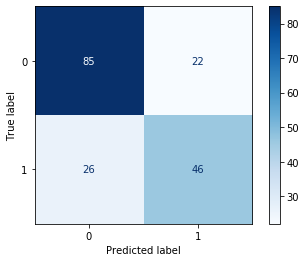

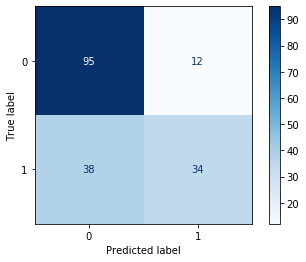

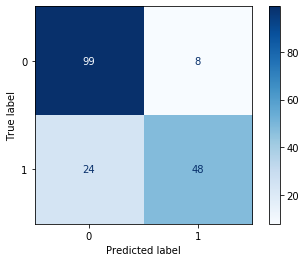

In [7]:
###### import metrics from sklearn ###################
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import recall
#from sklearn.metrics import precision

Tree_acc = accuracy_score(val_y, Tree_pred_val_y)
Tree_f1 = f1_score(val_y, Tree_pred_val_y)
print('\nTree accuracy = ', Tree_acc)
print('Tree f1 score = ', Tree_f1)
plot_confusion_matrix(Tree_model, val_X, val_y, cmap='Blues')  


### START CODE ###

#1. calculate & preint performce score for BB1
BB1_acc = accuracy_score(val_y, BB1_pred_val_y)
BB1_f1 = f1_score(val_y, BB1_pred_val_y)
print('\nBlack box model 1, accuracy = ', BB1_acc)
print('Black box model 1, f1 score = ', BB1_f1)
plot_confusion_matrix(BB1_model, val_X, val_y, cmap='Blues')  


#2. calculate & print performce score for BB2
BB2_acc = accuracy_score(val_y, BB2_pred_val_y)
BB2_f1 = f1_score(val_y, BB2_pred_val_y)
print('\nBlack box model 2, accuracy = ', BB2_acc)
print('Black box model 2, f1 score = ', BB2_f1)
plot_confusion_matrix(BB2_model, val_X, val_y, cmap='Blues')  

### END CODE ###


##### **Expected Output**:

<table>
    <tr>
        <td>
            Tree accuracy
        </td>
        <td>
            0.8547486033519553
        </td>
    </tr>
    <tr>
        <td>
            Tree f1 score
        </td>
        <td>
            0.803030303030303
        </td>
    </tr>
    <tr>
        <td>
            **Tree confusion matrix**
        </td>
        <td>
            <img src="images/confusion_matrix.png" width="250px"/>
        </td>
    </tr>
    <tr>
        <td>
            <b>Plus your additional results</b>
        </td>
    </tr> 
</table>


<h1>2. Model (Decision) Explanation</h1>

In this section you will evaluate the model and reason why the model is making its predictions. First you will explain the transparent box model. Later int his section for each of the two black box models you will use two different approaches to explain the models decision making, namely:

- Permutation Importance
- Partial Differential Plots

## 2.1 Explanations for a Transparent Model

The explainable model (transparent box) used in this lab was a Decision Tree.
Since this is explainable we can interrogate the model itself, for a Decision Trees we can plot the tree and follow the reasoning.

**your task is to:**

 - Run the following cell to plot the Decision Tree
 - Read the tree for a global explanation of the key factors in surviving according to this model.


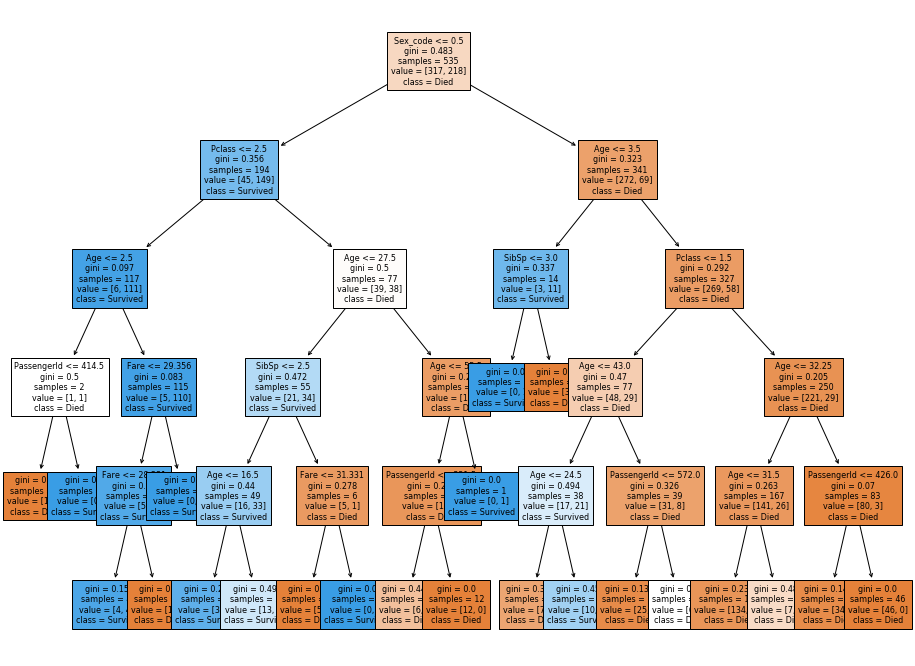

In [8]:
plt.figure(figsize=(16,12))
tree.plot_tree(Tree_model, class_names = ['Died','Survived'], feature_names = feature_names, fontsize=8, filled=True) 
plt.show()

## 2.2 Permutation Importance for Explanations </h3>

Experiment with Permutation Importance. This is a relatively simple way of measuring how much emphasis is placed (by the model) on any given variable to achieve accurate performance. i.e <em>What features have the biggest impact on prediction?</em> In this method is important to remember we do not care about how prediction algorithm works or change it in any way, it is treated as a black box [2]. 

<b>Algorithm</b>

The idea is the following: feature importance can be measured by looking at how much the score, $s$, (accuracy, F1, AUC, etc. - any score we’re interested in) decreases when a feature is not available.

<img src="images/shuffle.png" width="900px"/>
<caption><center> <i><b>Figure 5:</b> Example Dataset $D$ with feautre 'Age' randomly shuffled.</i></center></caption>

However, removing the feature will need a change to the model instead of removing a feature, $j$, we can replace it with random noise i.e. feature column remains as an input, but it no longer contains useful information. Take for example the feature, $j$, 'Age' in the data illustrated in Figure 5 above. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). A simple way to achieve this we can simply randomly shuffle the values in one column and run the test to get the score, $s$, we repeat and average this result for each feature, $j$, hence for the importance, $i_j$, we get a weight (mean difference) and variance of the difference in the output.

[2] A. Fisher, C. Rudin, and F. Dominici, “All models are wrong, but many are useful: Learning a variable’s importance by studying an entire class of prediction models simultaneously,” J. Mach. Learn. Res., vol. 20, no. Vi, 2019.

### 2.2.1 Implementing Permutation Importance 

**Your task is to:**

Create a functions that together will calculate permutation scores. In the first cell below you will implement a function, `Permutation_Scores()`, that calculates the blue portion of the algorithm below. the following inputs are expected by the function: fitted predictive model $m$, tabular dataset (validation or training) $D$.


-  Compute the reference score $s$ (accuracy) of the model $m$ on data $D$.
  - <font color='blue'>For each feature $j$ (column of $D$):
    - For each repetition $k$ in $1,...,K$:
      - Randomly shuffle column $j$ of dataset $D$ to generate a corrupted version of the data named $D~_{k,j}$
      - Compute the score $s_{k,j}$ of model $m$ on corrupted data $D~_{k,j}$</font>
    - Compute importance $i_j$ for feature $f_j$ defined as:

    $$i_j = s - \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$

In this first cell you will implement a function, `Permutation_Scores()`, that calculates the blue portion of the algorithm above.

**Hint** 

- The code `np.random.permutation()` can be used to shuffle a single column in a DataFrame
- use the `predict()` function of your model, $m$, to calculate score `s_kj`.


In [9]:
def Permutation_Scores(m, D, K):
    """
    A function that calculates feature importance for a range of input features, j, 
    for a given classificaiton model , m.
    
    Input:
    m - classification model
    D - DataFrame, oringal imput data (non perumtated).
    K - integer, the number or permutaions for each feature
    
    Output:
    s_ - numpy array (size: j,K) of scores (accuracy) for each feature, j, and perumtation, k.
    """
    
    # set-up some varibles for the loops 
    f = list(D.columns)     # list of feature names in test data 
    j_count = 0             # varible to count which feautre is being worked on
    
    ######  START CODE ###########
    
    ##1. create an array of zeros f rows (number of fetures) and K columns ( number of permutations)    
    s_ = np.zeros((len(f),K))
    
    #2. loop over each feature, f_j (columns in D)
    for j in f:       
        
        #3. loop to create multiple permutated feture columns for a given feature, f
        for k in range(K):    

            D_kj = D.copy()  # make a copy of the data set to shuffle the feature 

            #4. permutate the values in the column D realteing to feature j
            D_kj.loc[:,(j)] = np.random.permutation(D_kj.loc[:,(j)])

            #5. make new prediction for test data D_j,k
            pred = m.predict(D_kj)
            
            #6. calcaute new score s_k,j
            s_[j_count,k] = accuracy_score(val_y, pred)
            
    
        j_count +=1
    #7. return array of scores
    return(s_)

######### END CODE  #######

Run the cell below to test your `Permutation_Scores()` function, Notice:

- The score, $s_{j,k}$ for each feature (rows)
- There are eight rows one for each feature, $j$.
- There are four values in each row these are relating to the score for each permutation $k$.

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(train_X, train_y)
s_ = Permutation_Scores(model, val_X, 4)

model_pred_val_y = model.predict(val_X)
model_acc = accuracy_score(val_y, model_pred_val_y)

print('Shape of array',s_.shape)
print('Values of s_',s_)

Shape of array (8, 4)
Values of s_ [[0.81005587 0.81005587 0.81005587 0.82122905]
 [0.73184358 0.75977654 0.75418994 0.72625698]
 [0.80446927 0.78212291 0.80446927 0.79329609]
 [0.81005587 0.79329609 0.79329609 0.79888268]
 [0.81564246 0.82122905 0.80446927 0.81564246]
 [0.78212291 0.81564246 0.81564246 0.83240223]
 [0.65363128 0.69832402 0.70391061 0.64804469]
 [0.81005587 0.81005587 0.82681564 0.82681564]]


##### **Expected Output**:

<table>
    <tr>
        <td>
            **Shape of array**
        </td>
        <td>
            (8, 4)
        </td>
    </tr>
    <tr>
        <td>
            **Values in s_**
        </td>
        <td>
            [[0.84916201 0.8547486  0.83798883 0.8547486 ]
 [0.7877095  0.77653631 0.7877095  0.81564246]
 [0.81005587 0.83798883 0.81005587 0.82681564]
 [0.86592179 0.84916201 0.8547486  0.84916201]
 [0.8547486  0.87150838 0.8603352  0.8547486 ]
 [0.84357542 0.8603352  0.83240223 0.83240223]
 [0.67597765 0.64804469 0.69832402 0.69273743]
 [0.8547486  0.87150838 0.8603352  0.86592179]]
        </td>
    </tr>
</table>


### 2.1.1 Cont ...

In the following cell you will need to call your `Permutation_Scores()` function and complete the steps of the Permutation Importance calculation marked in blue below. Finally the code orders the presentation of the information.

-  Compute the reference score $s$ (accuracy) of the model $m$ on data $D$.
  - For each feature $j$ (column of $D$):
    - For each repetition $k$ in $1,...,K$:
      - Randomly shuffle column $j$ of dataset $D$ to generate a corrupted version of the data named $D~_{k,j}$
      - Compute the score $s_{k,j}$ of model $m$ on corrupted data $D~_{k,j}$
    - <font color='blue'>Compute importance $i_j$ for feature $f_j$ defined as: </font>

<font color='blue'>$$i_j = s - \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$ </font>

<font color='blue'>$$\mu_{s_{k,j}} = \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$ </font>

<font color='blue'>$$ i_{\sigma,j} = \frac{1}{K}\sum_{k=1}^{K} (s_{k,j} - \mu_{s_{k,j}})^2 $$</font>

<b>Your tasks are to:</b>


- The loop over each feature, $j$, is already written for the below tasks
    - For each feature $f_j$, calculate $i_j$. 
    - For each feature $f_j$, calculate $i_{\sigma,j}$
- Call your function `Permutation_Scores()` for the each of your models and test data `val_X`.
  - note using `model` for $m$ to generates the expected results.
- Set `s` to the accuracy score for the given model on the original test data `val_X`.
  - Use `model_acc` for, $s$, accuracy score to generate expected results

**Hint**

- Note when you plug in your models the results will be different to expected results.
- Calculate average, $\mu$, of a row in a numpy array [link to help](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) you will need to apply this to a row (slice) of the array.
- Calculate standard deviation, $\sigma$ of a row in a numpy array [Link to help](https://numpy.org/doc/stable/reference/generated/numpy.var.html) you will need to apply this to a row (slice) of the array.

In [15]:
K = 100
#### START CODE ####

#1. calc permunation scores using your function   
s_ = Permutation_Scores(model, val_X, K)

#2. set s to the score achived by the model on the original data 
s = accuracy_score(val_y, model_pred_val_y)

#### END CODE ######

perm_list = []       # set an empty list to capture permutation importance
D_columns = list(val_X.columns) 

for f in range(len(D_columns)):   # loop over all features 

    #### START CODE ####
    
    #3. calculate avergae i for each feature , j
    i = s - np.mean(s_[f])
    var = np.var(s_[f])
    
    #### END CODE ######

    # save Permutation Importance to output list 
    feat = [D_columns[f], i, var]
    perm_list.append(feat)

# print the Permutation Importance for each feature in order of greatest to smallest i
perm_list.sort(key = lambda x: x[1], reverse=True)  
for row in perm_list:
    print(row)

    
##### Double check this.

['Sex_code', 0.13581005586592165, 0.000530379825848132]
['Pclass', 0.07966480446927382, 0.00033870353609437916]
['SibSp', 0.026089385474860283, 6.0581754626884325e-05]
['Age', 0.02089385474860339, 0.00015955806622764576]
['Fare', 0.015251396648044535, 0.00014097874598171083]
['PassengerId', 0.013519553072625756, 5.566617770980921e-05]
['Embarked_code', 0.00810055865921766, 8.200430698167951e-05]
['Parch', -5.586592178774552e-05, 3.96335944571018e-05]


##### **Expected Output**:

<table>
    <tr>
        <td>
            ['Sex_code', 0.18625698324022333, 0.025882507321792304]
        </td>
    </tr>
    <tr>
        <td>
            ['Pclass', 0.1554189944134079, 0.024926219896193865]
        </td>
    </tr>
    <tr>
        <td>
            ['Age', 0.11262569832402236, 0.019636215887399992]
        </td>
    </tr>
    <tr>
        <td>
            ['SibSp', 0.023743016759776414, 0.0034776255860303603]
        </td>
    </tr>
    <tr>
        <td>
            ['Fare', 0.02324022346368715, 0.013142628784386694]
        </td>
    </tr>
    <tr>
        <td>
            ['PassengerId', 0.012234636871508275, 0.011683726812909244]
        </td>
    </tr>
    <tr>
        <td>
            ['Parch', -1.1102230246251565e-16, 1.1102230246251565e-16]
        </td>
    </tr>
    <tr>
        <td>
            ['Embarked_code', -1.1102230246251565e-16, 1.1102230246251565e-16]
        </td>
    </tr>
</table>

### 2.2.2 Permutation Importance Library

Obviously although we learn most about an approach by implementing it, most blackbox explanation algorithms have associated library that we can use to apply them to models. Here you will be introduced to a library of a number of explanation approaches. More documentation on the use of this library can be found [here](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)


**Your tasks are to:**

- Run the cell below to import a library from sklearn that implements permutation Importance
- Run the cell below to call the `PermutationImportance()` function from the library
- Run the cell below to print the results

In [43]:
######### import the libary that runs Permutation Importance ######
import eli5
from eli5.sklearn import PermutationImportance 

########## run Permutation Importance and print results ##########
Tree_perm = PermutationImportance(Tree_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(Tree_perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1687 ± 0.0402,Sex_code
0.0872 ± 0.0461,Pclass
0.0101 ± 0.0084,SibSp
0 ± 0.0000,Embarked_code
0 ± 0.0000,Parch
0 ± 0.0000,PassengerId
-0.0045 ± 0.0130,Fare
-0.0324 ± 0.0277,Age


**Your task is to:**

- Add the code to calculate and print the Permutation Importance for  your black box model 1
  - You can use the library or the code you built

In [37]:
#### START CODE ####

BB1_perm = PermutationImportance(BB1_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB1_perm, feature_names = val_X.columns.tolist())

 #### END CODE ######

Weight,Feature
0.0849 ± 0.0466,Sex_code
0.0816 ± 0.0378,Fare
0.0112 ± 0.0283,PassengerId
0.0078 ± 0.0397,SibSp
-0.0000 ± 0.0071,Parch
-0.0045 ± 0.0045,Embarked_code
-0.0078 ± 0.0055,Pclass
-0.0302 ± 0.0371,Age


**Your task is to:**

- Add the code to calculate and print the Permutation Importance for your black box model 2
  - You can use the library or the code you built

In [38]:
#### START CODE ####

BB2_perm = PermutationImportance(BB2_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB2_perm, feature_names = val_X.columns.tolist())

#### END CODE ######

Weight,Feature
0.1587 ± 0.0270,Sex_code
0.0771 ± 0.0334,Pclass
0.0179 ± 0.0217,PassengerId
0.0179 ± 0.0148,Fare
0.0112 ± 0.0353,Age
0.0112 ± 0.0200,Embarked_code
0.0101 ± 0.0109,SibSp
-0.0089 ± 0.0089,Parch


## 2.2 Partial Differential Plots

Partial Dependence Plots [3] are also calculated after a model has been fit, they offer more fidelity than Permutation  Importance, because they provide a distribution of the dependence of the model on a given variable as apposed to a mean and variance as is the case in Permutation Importance. 

<b>Algorithm</b>

In Partial Dependence Plots we set one feature ( in the example image above its 'Glucose') to a fixed value (for all entries) and note the change to the prediction score. Then we vary this fixed value from lowest to highest capturing the prediction score for each value. The change in the score is plotted (vertical axis) against the value (horizontal axis), this illustrates how the model responds to changes in this given variable.

<img src="images/PDP_table.png" width="500px"/>
<caption><center> <i><b>Figure 6:</b> Example Dataset $D$ with feature 'Glucose' set equal for all data examples.</i></center></caption>


[3] J. Krause, A. Perer, and K. Ng, “Interacting with Predictions,” in Proceedings of the 2016 CHI Conference on Human Factors in Computing Systems - CHI ’16, 2016, pp. 5686–5697.

<b>Implementation</b>

We will use a library to implement more documentation on the use of this library can be found [here](https://pdpbox.readthedocs.io/en/latest/#)

**Your task are to:**

- Run the cell below, this will:
    - import the PDP plot library
    - Show the PDP plot for the feature 'Fare' from the Decision Tree Model.
- For each of the three models:
  - Investigate at least three (more if appropriate) of the input feature's influence on the model outcome.
      - note you will need to plot each PDP lot in a new code cell

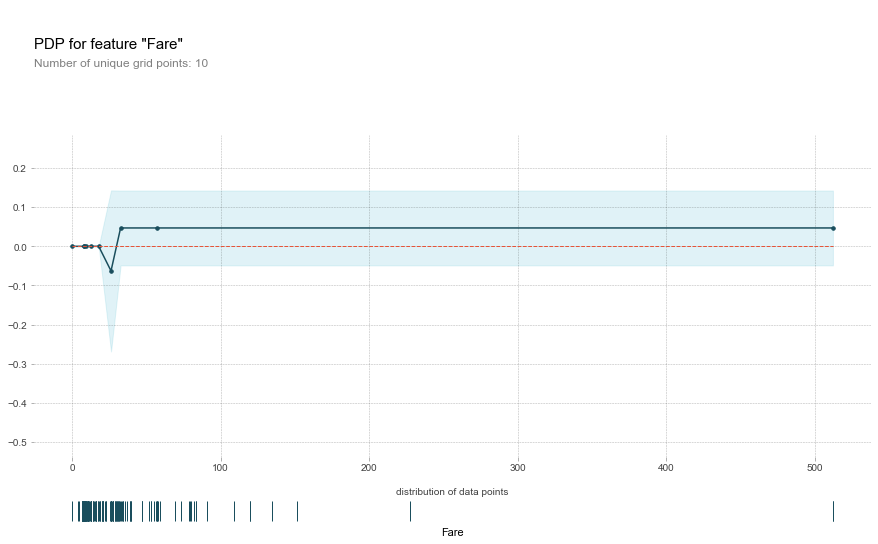

In [16]:
#import PDP library
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Fare')

# plot it
pdp.pdp_plot(pdp_Survive, 'Fare',plot_pts_dist=True)
plt.show()

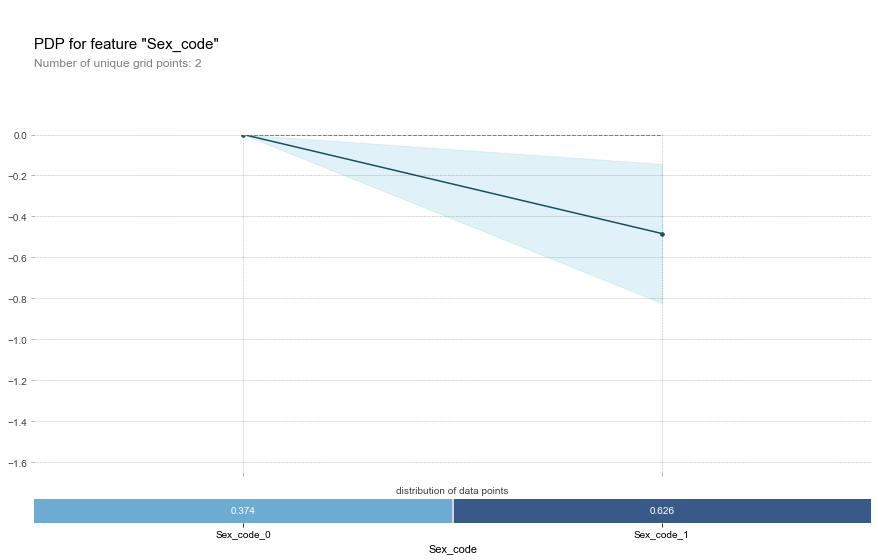

In [19]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Sex_code')


pdp.pdp_plot(pdp_Survive, 'Sex_code',plot_pts_dist=True)
plt.show()

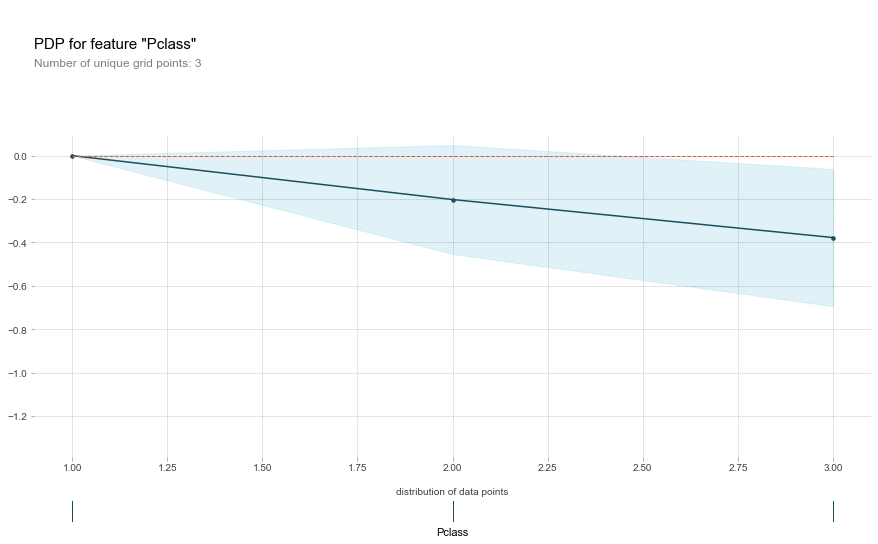

In [21]:
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Pclass')

pdp.pdp_plot(pdp_Survive, 'Pclass',plot_pts_dist=True)
plt.show()

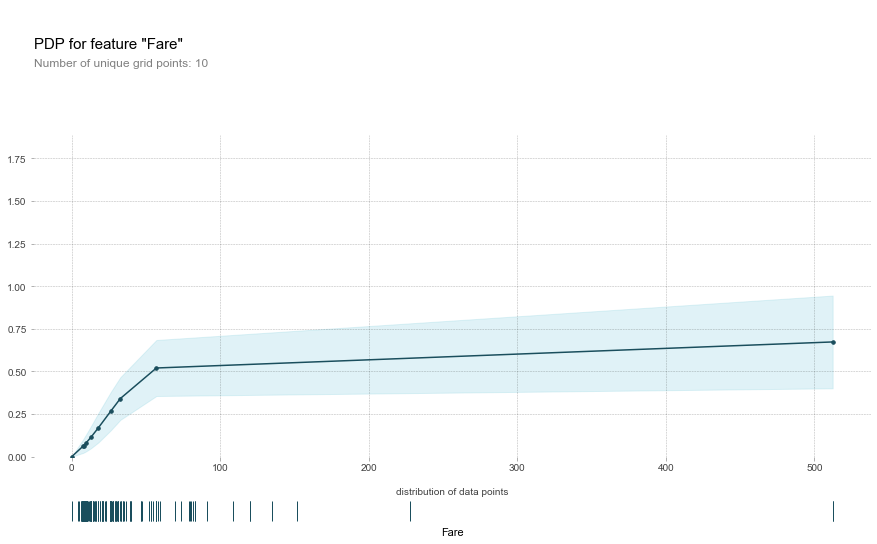

In [22]:
#### START CODE ####

#1. Create the data that we will plot
pdp_Survive_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Fare')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB1, 'Fare',plot_pts_dist=True)
plt.show()

#### END CODE ######

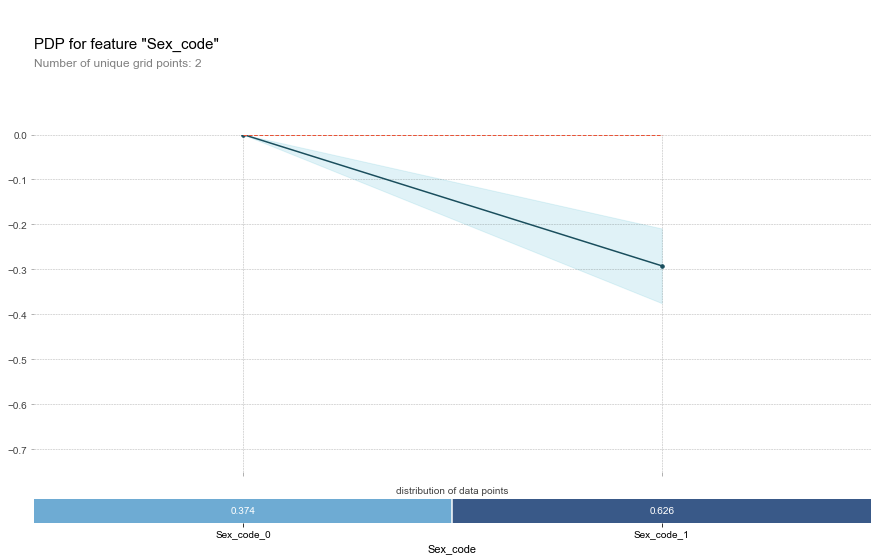

In [23]:
#1. Create the data that we will plot
pdp_Survive_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Sex_code')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB1, 'Sex_code',plot_pts_dist=True)
plt.show()

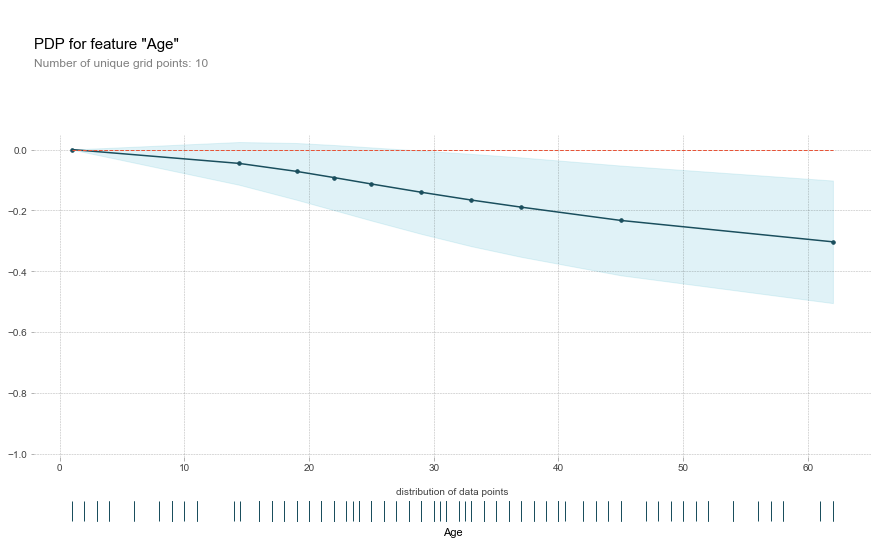

In [46]:
#1. Create the data that we will plot
pdp_Survive_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Age')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB1, 'Age',plot_pts_dist=True)
plt.show()

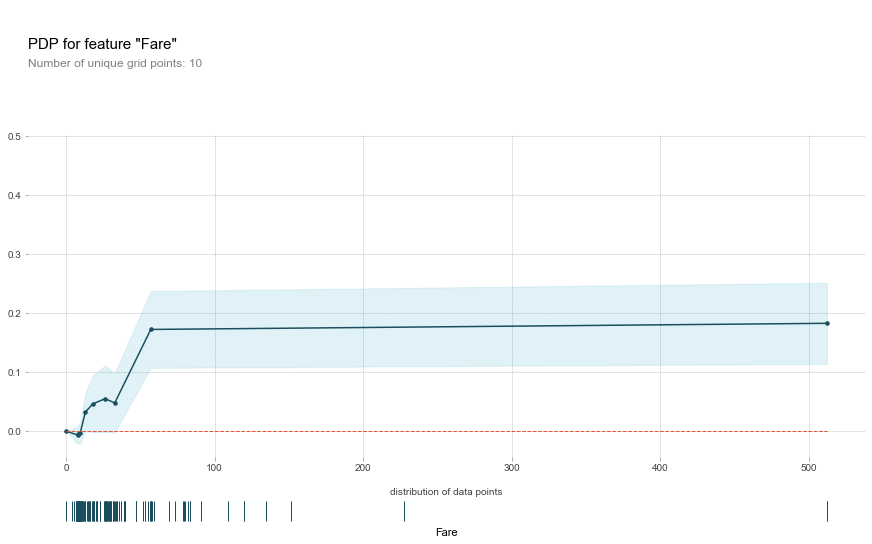

In [25]:
#1. Create the data that we will plot
pdp_Survive_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Fare')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB2, 'Fare',plot_pts_dist=True)
plt.show()

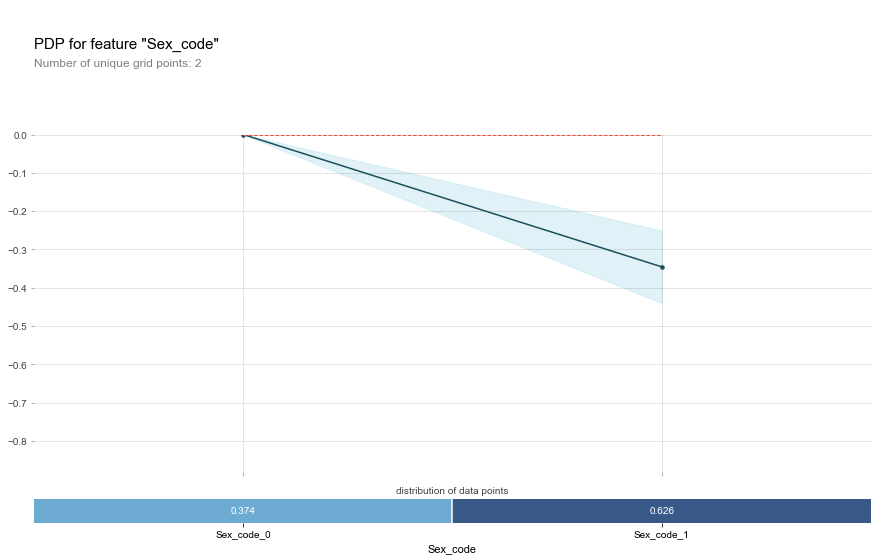

In [26]:
#1. Create the data that we will plot
pdp_Survive_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Sex_code')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB2, 'Sex_code',plot_pts_dist=True)
plt.show()

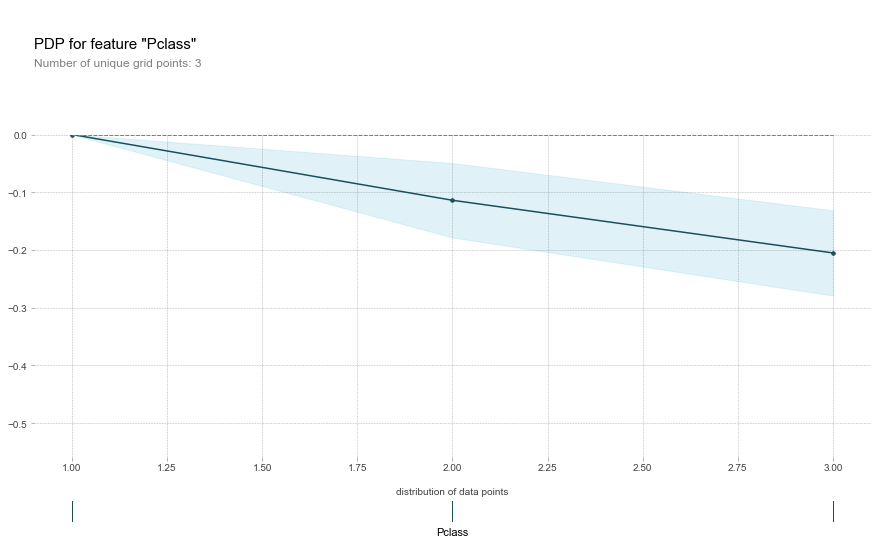

In [27]:
#1. Create the data that we will plot
pdp_Survive_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Pclass')

#2. plot it
pdp.pdp_plot(pdp_Survive_BB2, 'Pclass',plot_pts_dist=True)
plt.show()

<h1>2. Critical Analysis, Reflection & Discussion</h1>

- From your observations is it true to say that an increase in model complexity improves performance? <br>
No it does not. Some models done worse as the complexity increased.

- For each of three models write a short explanation of what were the key factors in predicting survival <br>
Tree Model: <br>
Sex code, P class and SibSp were the key factors in predicting. <br>
Black box 1 Model: <br>
Sex code, fare and PassengerId were the key factors in predicting. <br>
Black box 2 Model: <br>
Sex code, p class and PassengerId were the key factors in predicting. <br>

- For the explanations above, which of the two black box inspection techniques offered the most interpretable information and why? <br>
Permertation importance level as this is defined to be the change in the accuracy in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.<br>
However, it would be better to use both to see if what gets outputted does meet up to your expected assumptions.<br>

- For this task what is the impact of the model chosen <br>
    - specifically regarding performance of prediction <br>
The black box 2 model acrosss the board had a higher prediction accuracy and f1 score, showing that this model over the other two had the better performace in predicting. This model also had the lowest level of false psotives and negatives compared to the other models in the confusion matrix. <br>
    
    - explanation of the key factors that predict survival <br>
Sex code and p class. These are that women were more likely to be saved as they were put on the life boats with children and the better the p class of the passanger the likely the chance they would go on the boats as a priority as they were likely to have paid a higher fair and be seen as a priority to be save. Having a higher p class also could detimine how far down the boat you were, possibly being closer to where the collision happened and also further away to the life boats and you were further down deck.

- Compare and contrast the insights and interpretability provided by: <br>
    - the explainable model vs Black box models <br>
The explainable model we can display exactly the decsiosns that were made by the model to see how it came up with the outputs it did. However, in reagards to the black box models we can only investigate what features make the biggest imapact on its predicting to determine the outputted values. <br>

    - the two different approaches to explaining the black box models <br>
pdp allows us to see how much of an impact that feature had on the predicted outcome, to give us insights into does the output make sense to what we should expect. For example, the sex code should have an impact on the survival chances as women and children were priorities when try to escape the ship on the life boats. <br>
permutation importance will let us know what features, when mutated, had the most significat impact on the models predictions. Allowing us to see what the key features used while predicting are.<br>
    

- How do the three explaintion methods fair in the following criteria for an interpretable model:
    - Accuracy <br>
BB1 had the lowest accuracy, overall. with the non black box coming second and the black box 2 doing the best accross the board.
    
    - Fidelity <br>
The BB1 had the lowest fidelity, the non black box having the middle and then the blackbox 2 having the highest.